In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [4]:
%matplotlib inline
from pathlib import Path
import random
import statistics
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [6]:
y

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
...,...
3805,Osmancik
3806,Osmancik
3807,Osmancik
3808,Osmancik


# **Concat Table**

In [7]:
df= pd.concat([X,y], axis = 1)

In [8]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


# **1.Describe the data statistically**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [10]:
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3810
Number of columns: 8


In [11]:
# Count the total number of missing value
no_of_mising = pd.isnull(df).sum().sum()
print("Total number of missing value is ")
print(no_of_mising)

Total number of missing value is 
0


In [12]:
# Mean of two dirrerent class
print(df[df['Class']=='Cammeo']['Perimeter'].mean())
print(df[df['Class']=='Osmancik']['Perimeter'].mean())

487.4389417769939
429.4155051692202


In [13]:
df[df['Class']=='Cammeo'].describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,14162.892025,487.438942,205.478589,88.767532,0.901047,14494.426994,0.651420
std,1286.770521,22.181518,10.333854,5.350244,0.013381,1309.418680,0.082197
min,9908.000000,410.506012,170.781647,67.695343,0.837433,10205.000000,0.497413
25%,13289.250000,473.090248,198.580872,85.376022,0.893274,13620.250000,0.580921
50%,14212.000000,488.179504,205.716743,88.830879,0.901759,14536.500000,0.634436
75%,14997.000000,502.637756,212.433681,92.127367,0.909835,15361.000000,0.717667
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [14]:
df[df['Class']=='Osmancik'].describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,11549.783486,429.415505,176.287755,84.479042,0.876271,11799.585780,0.669796
std,1041.908607,20.154394,9.362405,5.302667,0.018999,1062.804346,0.072340
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.501078
25%,10850.500000,416.207993,169.989490,81.333870,0.863816,11097.000000,0.610567
50%,11552.500000,429.239502,175.665390,84.633549,0.876206,11813.500000,0.652695
75%,12269.000000,442.506744,182.099850,87.932961,0.889286,12524.000000,0.732591
max,15420.000000,503.459992,209.651169,101.762260,0.935528,15800.000000,0.832747


In [15]:
# Descriptive statistics for each class
description_by_class = df.groupby('Class').describe()

description_by_class


Area                                                        \
           count          mean          std     min       25%      50%   
Class                                                                    
Cammeo    1630.0  14162.892025  1286.770521  9908.0  13289.25  14212.0   
Osmancik  2180.0  11549.783486  1041.908607  7551.0  10850.50  11552.5   

                           Perimeter              ... Convex_Area           \
              75%      max     count        mean  ...         75%      max   
Class                                             ...                        
Cammeo    14997.0  18913.0    1630.0  487.438942  ...     15361.0  19099.0   
Osmancik  12269.0  15420.0    2180.0  429.415505  ...     12524.0  15800.0   

          Extent                                                              \
           count      mean       std       min       25%       50%       75%   
Class                                                                          
Cammeo    1630.0  0.651420  0.082197  0.497413  0.580921  0.634436  0.717667   
Osmancik  2180.0  0.669796  0.072340  0.501078  0.610567  0.652695  0.732591   

                    
               max  
Class               
Cammeo    0.861050  
Osmancik  0.832747  

[2 rows x 56 columns]

# **2.Histogram compare each group for measure by Area**

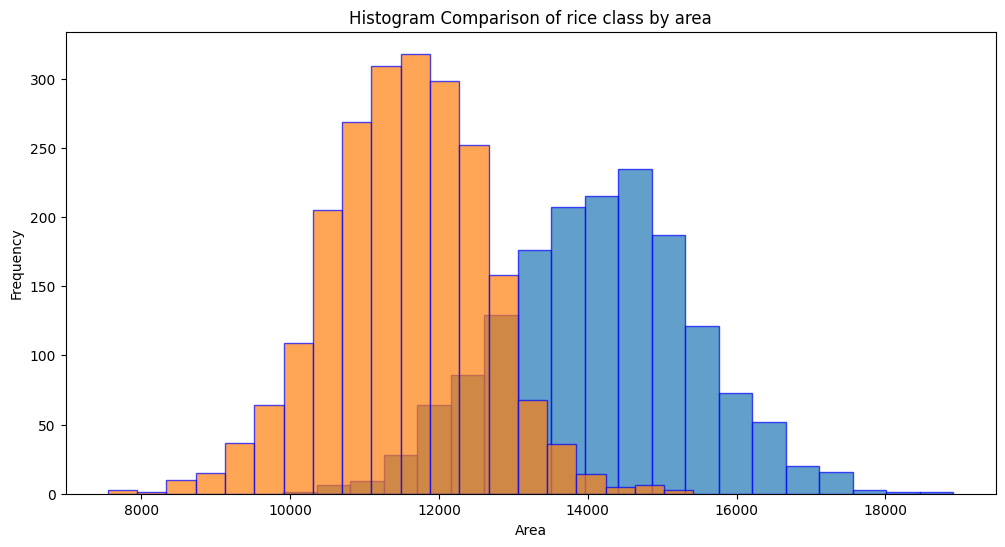

In [16]:
# comparison of rice class by the actual number of observations in each bin "Area"
C_area = df[df['Class'] == 'Cammeo']['Area']
O_area = df[df['Class'] == 'Osmancik']['Area']
plt.figure(figsize=(12, 6))
plt.hist(C_area,  bins=20, alpha=0.7, label='Cammeo', edgecolor='Blue')
plt.hist(O_area, bins=20, alpha=0.7, label='Osmancik', edgecolor='Blue')
plt.title('Histogram Comparison of rice class by area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

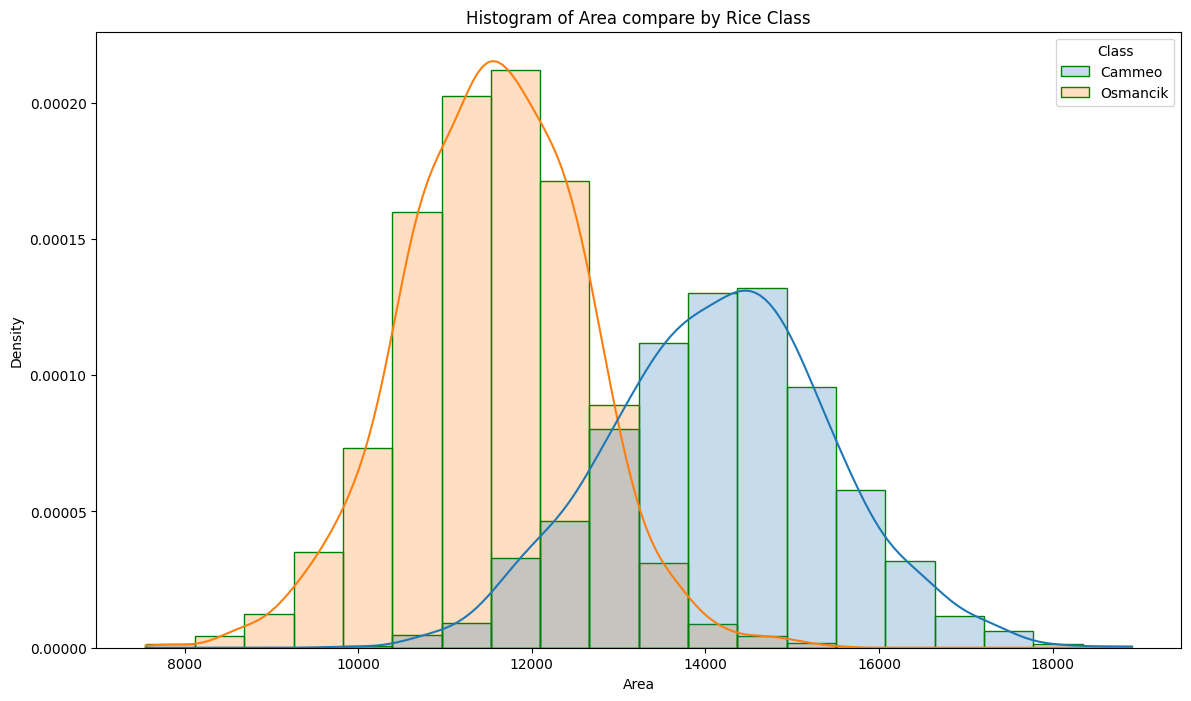

In [17]:
# Comparison of rice class by shape and spread of the data
plt.figure(figsize=(14,8))
sns.histplot(data=df, x="Area",hue="Class", kde=True, bins=20, alpha=0.25, stat="density", edgecolor='green')
plt.title('Histogram of Area compare by Rice Class')
plt.xlabel('Area')
plt.ylabel('Density')
plt.show()

# **3.Comparative Boxplot of each group by Area**

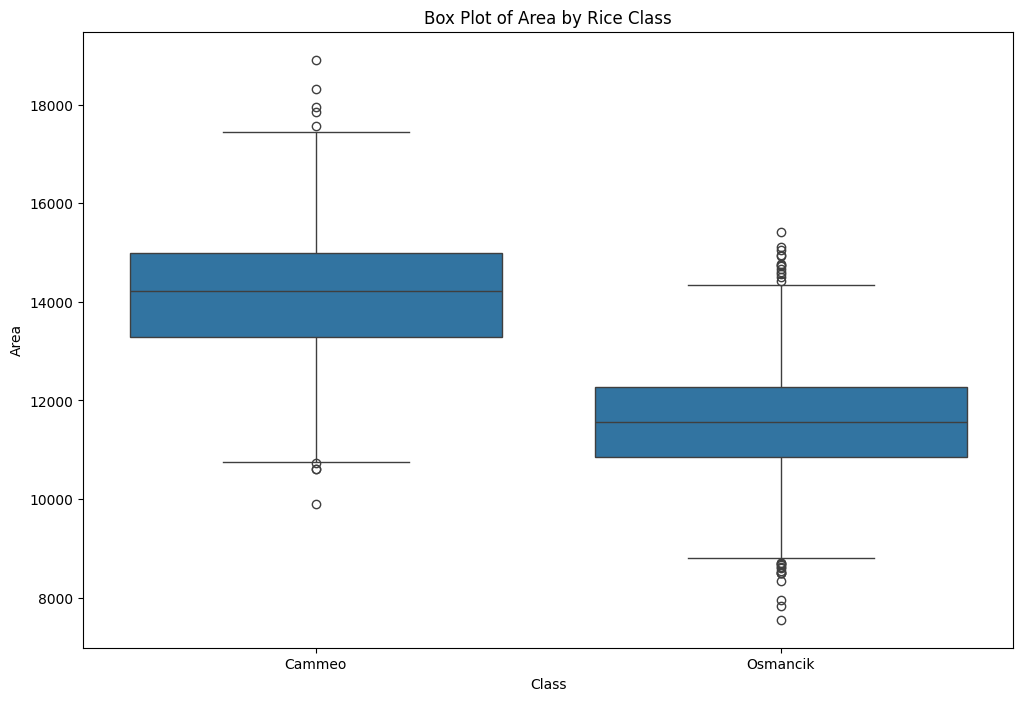

In [18]:
# Box plot for Area by class
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Area', data=df)
plt.title('Box Plot of Area by Rice Class')
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()


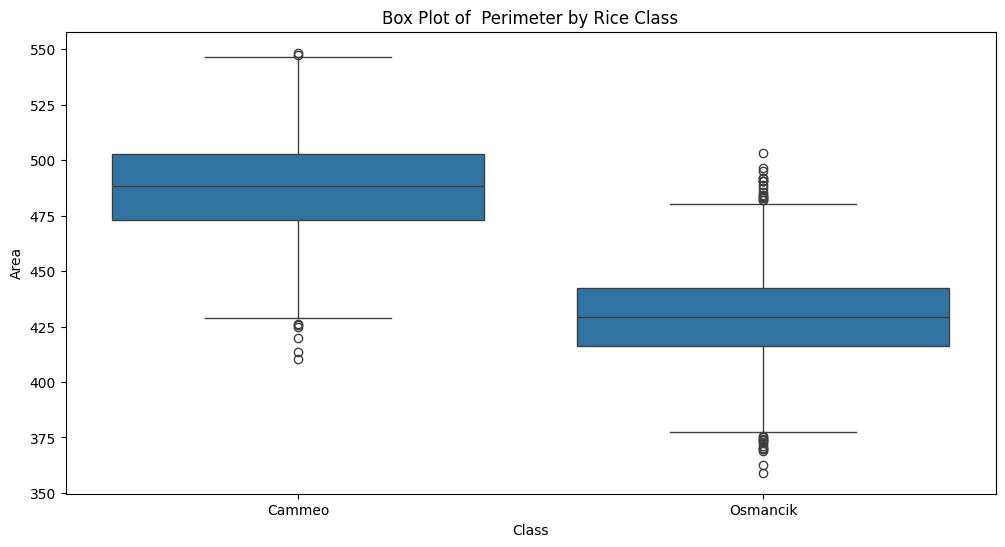

In [19]:
# Box plot for Perimeter by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Perimeter', data=df)
plt.title('Box Plot of  Perimeter by Rice Class')
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()

# **4. f - Test for Convex_Area**

In [ ]:
# Extracting convex_area data for each class
cammeo_group1 = df[df['Class'] == 'Cammeo']['Convex_Area']
osmancik_group2 = df[df['Class'] == 'Osmancik']['Convex_Area']
# converting list to array
p=np.array(cammeo_group1)
q=np.array(osmancik_group2)
# Calculate the variance of each group
print(np.var(cammeo_group1), np.var(osmancik_group2))

In [21]:
def f_test(cammeo_group1, osmancik_group2):
  f= np.var(cammeo_group1, ddof=1)/np.var(osmancik_group2, ddof=1)
  nun =p.size-1
  dun =q.size-1
  p_value = 1-scipy.stats.f.cdf(f, nun, dun)
  return f, p_value

f_test(p,q)

(1.517925375272238, 1.1102230246251565e-16)

# **5. t-Test statistics for Perimeter and Convex_Area**

In [22]:
# t-Test for perimeter by class
s1= df[df['Class']=='Cammeo']['Perimeter']
s2= df[df['Class']=='Osmancik']['Perimeter']

In [23]:
res = stats.ttest_ind(s1,s2,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0000


In [24]:
res

TtestResult(statistic=83.04476645505474, pvalue=0.0, df=3316.1815163829756)

In [25]:
# t-Test for Convex_Area by class
res1 = stats.ttest_ind(cammeo_group1,osmancik_group2,
                      equal_var=False)
print(f'p-value for single sided test: {res1.pvalue / 2:.4f}')

p-value for single sided test: 0.0000


In [26]:
res1

TtestResult(statistic=68.01097417202351, pvalue=0.0, df=3071.876757683092)

# **t-Test for all features**

In [27]:
# Separate the dataset by class
cammeo_data = df[df['Class'] == 'Cammeo']
osmancik_data = df[df['Class'] == 'Osmancik']
print(cammeo_data)
print(osmancik_data)

       Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231  525.578979         229.749878          85.093788      0.928882   
1     14656  494.311005         206.020065          91.730972      0.895405   
2     14634  501.122009         214.106781          87.768288      0.912118   
3     13176  458.342987         193.337387          87.448395      0.891861   
4     14688  507.166992         211.743378          89.312454      0.906691   
...     ...         ...                ...                ...           ...   
1625  15879  517.927002         216.650131          94.656204      0.899506   
1626  14330  493.184998         209.767319          87.898949      0.907972   
1627  14155  480.522003         200.546738          91.059677      0.890973   
1628  13939  484.393005         207.026276          86.223473      0.909142   
1629  12488  469.828003         200.743759          80.046852      0.917059   

      Convex_Area    Extent   Class  
0           1

In [29]:
# T-test for all features
feature_cols =df.columns[:-1]  # Excluding the 'Class' column
t_test_results = {}
print(feature_cols)

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')


In [30]:
for feature in feature_cols:
    t_stat, p_val = ttest_ind(cammeo_data[feature], osmancik_data[feature], equal_var=False)
    t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_val}

In [ ]:
t_test_results

{'Area': {'t_statistic': 67.1622793043339, 'p_value': 0.0},
 'Perimeter': {'t_statistic': 83.04476645505474, 'p_value': 0.0},
 'Major_Axis_Length': {'t_statistic': 89.77631726814286, 'p_value': 0.0},
 'Minor_Axis_Length': {'t_statistic': 24.572057976097536,
  'p_value': 4.087120133721662e-123},
 'Eccentricity': {'t_statistic': 47.209411611059714, 'p_value': 0.0},
 'Convex_Area': {'t_statistic': 68.01097417202351, 'p_value': 0.0},
 'Extent': {'t_statistic': -7.182676746435633,
  'p_value': 8.437988055017781e-13}}

# **6. Correlation Matrix for the Cammeo and Osmancik Class.**

In [31]:
# separate for each class ("Cammeo" and "Osmancik") in the dataset
data_Cammeo = df[df['Class']== 'Cammeo'].select_dtypes(include=[np.number])
data_Osmancik = df[df['Class']== 'Osmancik'].select_dtypes(include=[np.number])

In [32]:
data_Cammeo

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
1625,15879,517.927002,216.650131,94.656204,0.899506,16484,0.687760
1626,14330,493.184998,209.767319,87.898949,0.907972,14701,0.619595
1627,14155,480.522003,200.546738,91.059677,0.890973,14462,0.722194
1628,13939,484.393005,207.026276,86.223473,0.909142,14233,0.642469


In [33]:
# Calculating correlation matrice
correlation_Cammeo = data_Cammeo.corr()
print(correlation_Cammeo)


                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.931691           0.786017           0.852308   
Perimeter          0.931691   1.000000           0.930621           0.638126   
Major_Axis_Length  0.786017   0.930621           1.000000           0.351720   
Minor_Axis_Length  0.852308   0.638126           0.351720           1.000000   
Eccentricity      -0.179937   0.135539           0.459100          -0.663864   
Convex_Area        0.997565   0.938594           0.785252           0.852424   
Extent             0.061593  -0.035224          -0.039316           0.117643   

                   Eccentricity  Convex_Area    Extent  
Area                  -0.179937     0.997565  0.061593  
Perimeter              0.135539     0.938594 -0.035224  
Major_Axis_Length      0.459100     0.785252 -0.039316  
Minor_Axis_Length     -0.663864     0.852424  0.117643  
Eccentricity           1.000000    -0.180199 -0.141202  
Convex_Area      

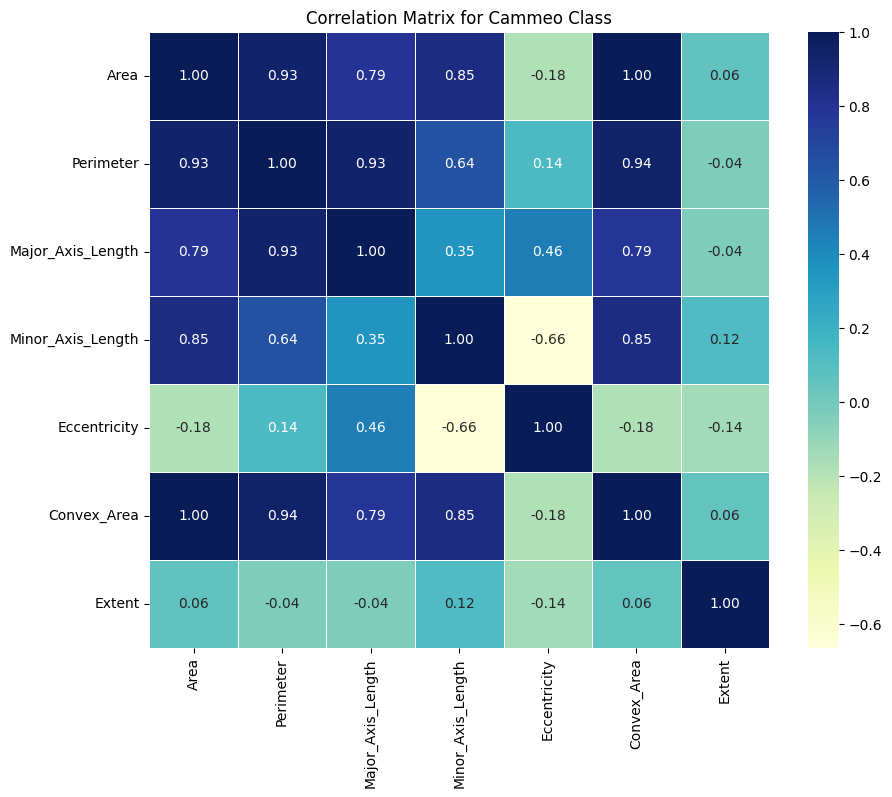

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_Cammeo, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Cammeo Class')
plt.show()


In [35]:
data_Osmancik

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
1630,13447,455.648010,183.957581,94.458138,0.858103,13867,0.625908
1631,13233,459.859009,192.590713,88.346718,0.888577,13436,0.588735
1632,12538,452.660004,188.805283,86.109718,0.889940,12846,0.684165
1633,11881,439.184998,183.889526,83.349472,0.891379,12097,0.582830
1634,11750,428.375000,178.553619,84.704185,0.880314,11869,0.608682
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [36]:
# Calculating correlation matrice
correlation_Osmancik = data_Osmancik.corr()
print(correlation_Osmancik)

                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.924036           0.743446           0.812137   
Perimeter          0.924036   1.000000           0.905145           0.574882   
Major_Axis_Length  0.743446   0.905145           1.000000           0.219382   
Minor_Axis_Length  0.812137   0.574882           0.219382           1.000000   
Eccentricity      -0.161562   0.156902           0.530577          -0.702419   
Convex_Area        0.997706   0.930983           0.738618           0.816546   
Extent             0.018201  -0.085638          -0.109598           0.114899   

                   Eccentricity  Convex_Area    Extent  
Area                  -0.161562     0.997706  0.018201  
Perimeter              0.156902     0.930983 -0.085638  
Major_Axis_Length      0.530577     0.738618 -0.109598  
Minor_Axis_Length     -0.702419     0.816546  0.114899  
Eccentricity           1.000000    -0.168829 -0.179848  
Convex_Area      

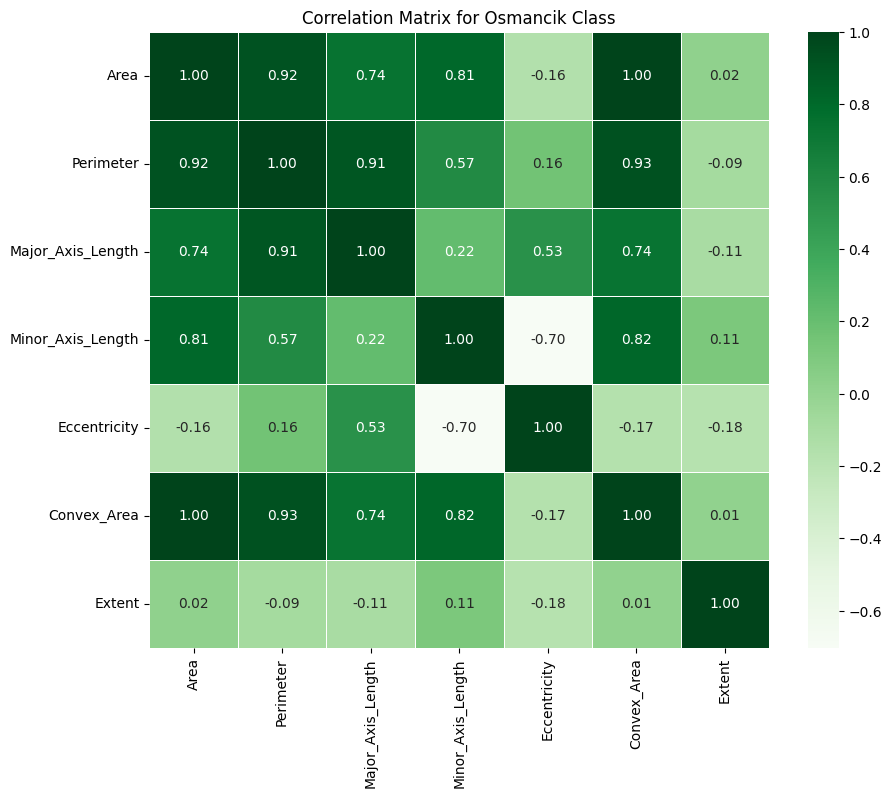

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_Osmancik, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Osmancik Class')
plt.show()

# **Correlation Matrix between All the columns**

                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966453           0.903015           0.787840   
Perimeter          0.966453   1.000000           0.971884           0.629828   
Major_Axis_Length  0.903015   0.971884           1.000000           0.452092   
Minor_Axis_Length  0.787840   0.629828           0.452092           1.000000   
Eccentricity       0.352095   0.544601           0.710897          -0.291683   
Convex_Area        0.998939   0.969937           0.903381           0.787318   
Extent            -0.061184  -0.130923          -0.139562           0.063366   

                   Eccentricity  Convex_Area    Extent  
Area                   0.352095     0.998939 -0.061184  
Perimeter              0.544601     0.969937 -0.130923  
Major_Axis_Length      0.710897     0.903381 -0.139562  
Minor_Axis_Length     -0.291683     0.787318  0.063366  
Eccentricity           1.000000     0.352716 -0.198580  
Convex_Area      

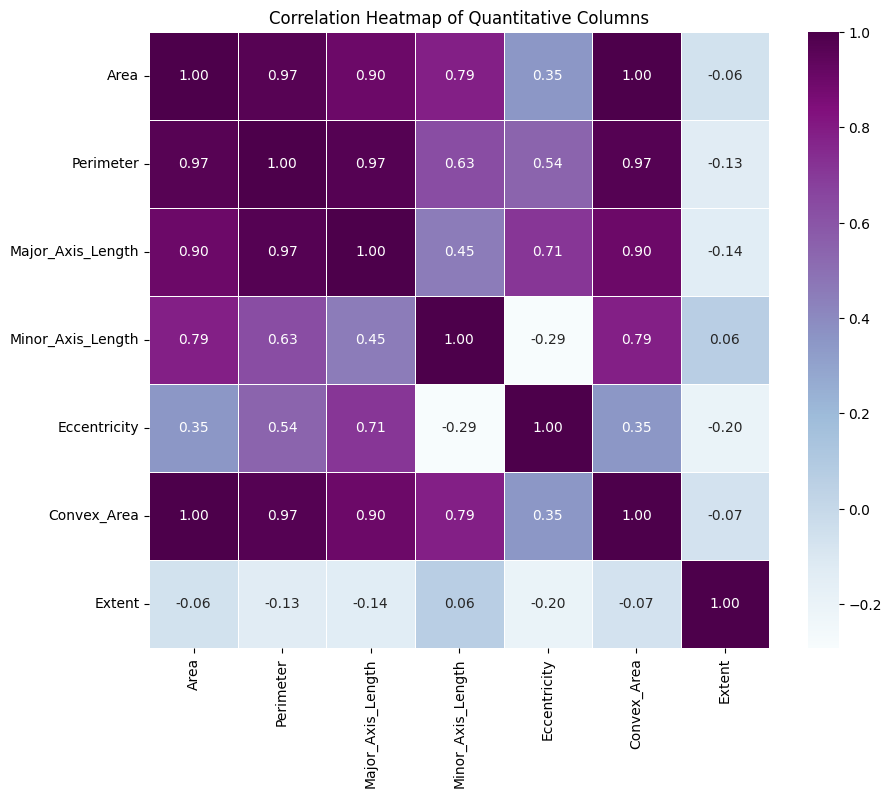

In [38]:
# Select quantitative columns
quantitative_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[quantitative_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Quantitative Columns')
plt.show()